In [2]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [3]:
#Lendo os conjuntos de dados
trips_by_company = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff_stats = pd.read_csv('/datasets/project_sql_result_04.csv')
loop_to_ohare = pd.read_csv('/datasets/project_sql_result_07.csv')

In [4]:
trips_by_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
trips_by_company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [6]:
trips_by_company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [7]:
dropoff_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [8]:
dropoff_stats.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [9]:
dropoff_stats.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [10]:
loop_to_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [11]:
loop_to_ohare.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [12]:
loop_to_ohare.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [13]:
#Faz o ranking dos 10 bairros com mais destinos
top_dropoff_neighborhoods = dropoff_stats.sort_values(by='average_trips', ascending=False).head(10)
top_dropoff_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


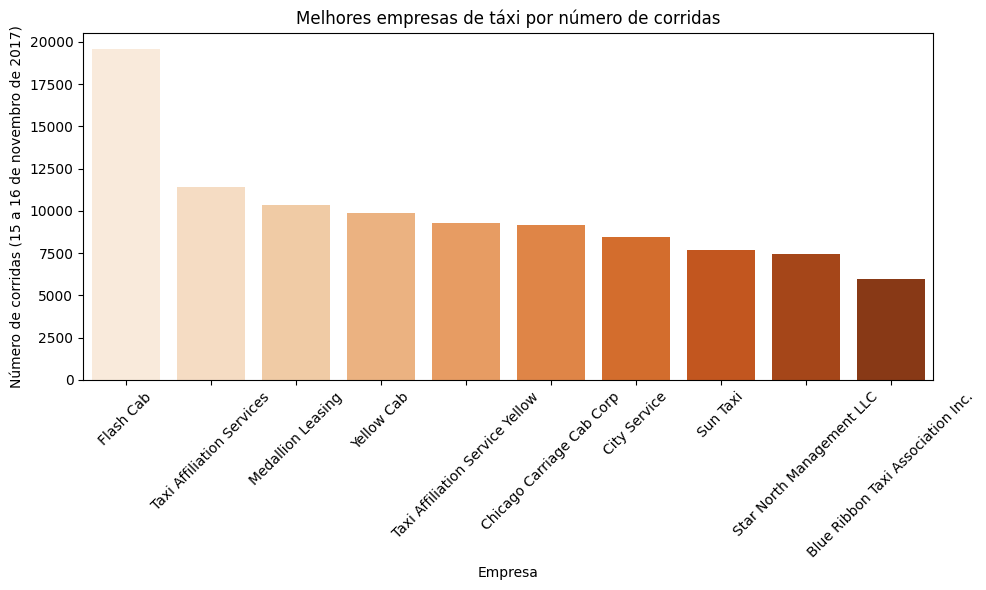

In [14]:
#Gráfico as 10 melhores empresas de táxi

top_company = trips_by_company.sort_values(by='trips_amount', ascending=False).head(10)

plt.figure(figsize=(10, 6))

sns.barplot(data=top_company,
            x='company_name',
            y='trips_amount',
            palette='Oranges')  
plt.title("Melhores empresas de táxi por número de corridas")
plt.xlabel("Empresa")
plt.ylabel("Número de corridas (15 a 16 de novembro de 2017)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

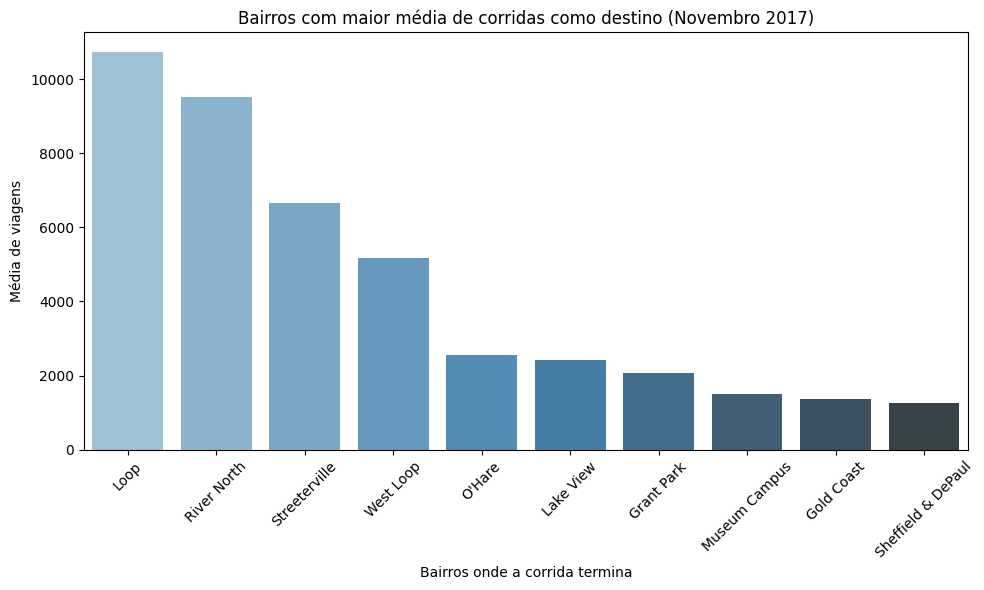

In [16]:
#Gráfico dos bairros com mais destinos de viagem

plt.figure(figsize=(10, 6))

sns.barplot(data=top_dropoff_neighborhoods,
            x='dropoff_location_name',
            y='average_trips',
            palette='Blues_d')

plt.title("Bairros com maior média de corridas como destino (Novembro 2017)")
plt.xlabel("Bairros onde a corrida termina")
plt.ylabel("Média de viagens")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A Flash Cab realizou aproximadamente 20 mil corridas, enquanto a segunda colocada, Taxi Affiliation Services, teve cerca de 11 mil, uma diferença de quase o dobro e Loop e River North, foram os destinos mais populares. Isso pode estar relacionado à concentração de comércio, turismo e áreas corporativas

In [17]:
#Teste de hipótese

# Converte a coluna start_ts para datetime
loop_to_ohare['start_ts'] = pd.to_datetime(loop_to_ohare['start_ts'])

# Cria uma coluna com True para dias chuvosos e False para dias com sol
loop_to_ohare['weather_bad'] = loop_to_ohare['weather_conditions'].str.contains("Bad")

# Grupos de sábados chuvosos
rainy_saturday_durations = loop_to_ohare.loc[loop_to_ohare.weather_bad, 'duration_seconds']

# Grupos de sábados com sol
clear_saturday_durations = loop_to_ohare.loc[~loop_to_ohare.weather_bad, 'duration_seconds']

# Define nível de significância
alpha = 0.05

# Calcula as variâncias
var_bad = rainy_saturday_durations.var()
var_good = clear_saturday_durations.var()

# Exibe as variâncias com 2 casas decimais
print(f"Variância do tempo ruim (chuvoso): {var_bad:.2f}")
print(f"Variância do tempo bom (sem chuva): {var_good:.2f}")
print("")

# Calcula e exibe a razão entre as variâncias
variancia_ratio = var_bad / var_good
print(f"Razão entre as variâncias (tempo ruim / tempo bom): {variancia_ratio:.2f}")
print("")

# Rodando o teste t com equal_var dependendo da comparação das variâncias
t_stat, p_value = ttest_ind(rainy_saturday_durations, clear_saturday_durations, equal_var=False)

# Exibe o resultado
print(f"Estatística t: {t_stat:.4f}")
print(f"Valor-p: {p_value:.4f}")

# Interpreta o resultado
if p_value < alpha:
    print("Rejeitamos a hipótese nula: há diferença significativa nas médias das avaliações.")
else:
    print("Não rejeitamos a hipótese nula: não há diferença significativa nas médias.")


Variância do tempo ruim (chuvoso): 520294.09
Variância do tempo bom (sem chuva): 576382.01

Razão entre as variâncias (tempo ruim / tempo bom): 0.90

Estatística t: 7.1860
Valor-p: 0.0000
Rejeitamos a hipótese nula: há diferença significativa nas médias das avaliações.


Rejeitamos a hipótese nula: Com base nos resultados, podemos concluir que a duração dos passeios realmente muda nos sábados chuvosos em comparação aos sábados com tempo bom.